# Introduction to GPT-4o and GPT-4o mini

    GPT-4o ("o" for "omni") and GPT-4o mini are natively multimodal models 
    designed to handle a combination of text, audio, and video inputs, and 
    can generate outputs in text, audio, and image formats. 

    GPT-4o mini is the lightweight version of GPT-4o.

# Background

    Before GPT-4o, users could interact with ChatGPT using Voice Mode, which operated with three separate models. 
    
    GPT-4o integrates these capabilities into a single model that's trained across text, vision, and audio. 
    
    This unified approach ensures that all inputs — whether text, visual, or auditory — are processed cohesively by the same neural network.

    GPT-4o mini is the next iteration of this omni model family, available in a smaller and cheaper version. This model offers higher accuracy than GPT-3.5 
    
    Turbo while being just as fast and supporting multimodal inputs and outputs.

# Current API Capabilities

    Currently, the API supports {text, image} inputs only, with {text} outputs, the same modalities as gpt-4-turbo.

    Additional modalities, including audio, will be introduced soon. This guide will help you get started with using GPT-4o mini for text, image, and video understanding.

# Getting Started
    Install OpenAI SDK for Python

In [ ]:
%pip install --upgrade openai

# Configure the OpenAI client and submit a test request

    To setup the client for our use, we need to create an API key to use with our request. Skip these steps if you already have an API key for usage.

    You can get an API key by following these steps:

# Create a new project

# Generate an API key in your project

    Once we have this setup, let's start with a simple {text} input to the model for our first request. 

    We'll use both system and user messages for our first request, and we'll receive a response from the assistant role.

In [ ]:
pip install openai --upgrade

In [ ]:
from openai import OpenAI
import os

## Set the API key and model name

MODEL="gpt-4o"

client = OpenAI(api_key=api_key)

In [4]:
query = '''What is 5*5? Also solve 5 + 10 + 20 + 30 =?'''

completion = client.chat.completions.create(
  model=MODEL,
  messages=[
    {"role": "system", "content": "You are a helpful assistant. Help me with my math homework!"}, # <-- This is the system message that provides context to the model
    {"role": "user", "content": query},  # <-- This is the user message for which the model will generate a response
  ],
)

print(completion.choices[0].message.content)

The product of \(5 \times 5\) is \(25\).

For the sum, we simply add the numbers together:

\[5 + 10 + 20 + 30 = 65.\]

So, the answers are:

- \(5 \times 5 = 25\)
- \(5 + 10 + 20 + 30 = 65\)


# Image Processing

    GPT-4o mini can directly process images and take intelligent actions based on the image. We can provide images in two formats:

    Base64 Encoded
    URL

    Let's first view the image we'll use, then try sending this image as both Base64 and as a URL link to the API

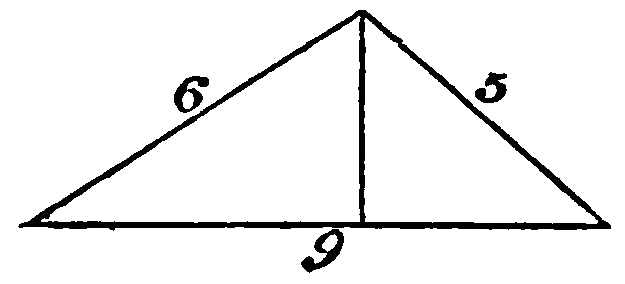

In [5]:
from IPython.display import Image, display, Audio, Markdown
import base64

IMAGE_PATH = "/Users/surendra/ai_embed/Machinelearnex/data/triangle.png"

# Preview image for context
display(Image(IMAGE_PATH))

# Base64 Image Processing

In [6]:
# Open the image file and encode it as a base64 string
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

base64_image = encode_image(IMAGE_PATH)

response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": "You are a helpful assistant that responds in Markdown. Help me with my math homework!"},
        {"role": "user", "content": [
            {"type": "text", "text": "What's the area of the triangle?"},
            {"type": "image_url", "image_url": {
                "url": f"data:image/png;base64,{base64_image}"}
            }
        ]}
    ],
    temperature=0.0,
)

print(response.choices[0].message.content)

To find the area of the triangle, you can use the formula:

\[
\text{Area} = \frac{1}{2} \times \text{base} \times \text{height}
\]

In the triangle you provided:

- The base is \(9\) (the length at the bottom).
- The height is \(5\) (the vertical line from the top vertex to the base).

Now, plug in the values:

\[
\text{Area} = \frac{1}{2} \times 9 \times 5
\]

Calculating this gives:

\[
\text{Area} = \frac{1}{2} \times 45 = 22.5
\]

Thus, the area of the triangle is **22.5 square units**.


# URL Image Processing

In [7]:
response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": "You are a helpful assistant that responds in Markdown. Help me with my math homework!"},
        {"role": "user", "content": [
            {"type": "text", "text": "What's the area of the triangle?"},
            {"type": "image_url", "image_url": {
                "url": "https://upload.wikimedia.org/wikipedia/commons/e/e2/The_Algebra_of_Mohammed_Ben_Musa_-_page_82b.png"}
            }
        ]}
    ],
    temperature=0.0,
)

print(response.choices[0].message.content)

To find the area of the triangle, we can use the formula for the area of a triangle:

\[
\text{Area} = \frac{1}{2} \times \text{base} \times \text{height}
\]

In the triangle you provided:

- The base is \(9\) (the length at the bottom).
- The height is \(5\) (the vertical line from the top vertex to the base).

Now, substituting the values into the formula:

\[
\text{Area} = \frac{1}{2} \times 9 \times 5
\]

Calculating this:

\[
\text{Area} = \frac{1}{2} \times 45 = 22.5
\]

Thus, the area of the triangle is **22.5 square units**.


# Video Processing

    While it's not possible to directly send a video to the API, GPT-4o can understand videos if you sample frames and then provide them as images.

    Since GPT-4o mini in the API does not yet support audio-in (as of July 2024), we'll use a combination of GPT-4o mini and Whisper to process both the audio and visual for a provided video, and showcase two usecases:

    1. Summarization

    2. Question and Answering
    
# Setup for Video Processing

    We'll use two python packages for video processing - opencv-python and moviepy.

    These require ffmpeg, so make sure to install this beforehand. Depending on your OS, you may need to run brew install ffmpeg or sudo apt install ffmpeg
    

In [ ]:
# brew install ffmpeg on MacOS

In [3]:
#%pip install opencv-python

In [ ]:
%pip install moviepy

# Process the video into two components: frames and audio

In [8]:
#%%writefile video_processing.py

import cv2
from moviepy.editor import VideoFileClip
import time
import base64

# We'll be using the OpenAI DevDay Keynote Recap video. You can review the video here: https://www.youtube.com/watch?v=h02ti0Bl6zk
VIDEO_PATH = "data/keynote_recap.mp4"

In [3]:
pwd

'/Users/surendra/ai_embed/Machinelearnex'

In [9]:
VIDEO_PATH = "data/keynote_recap.mp4"

def process_video(video_path, seconds_per_frame=2):
    base64Frames = []
    base_video_path, _ = os.path.splitext(video_path)

    video = cv2.VideoCapture(video_path)
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = video.get(cv2.CAP_PROP_FPS)
    frames_to_skip = int(fps * seconds_per_frame)
    curr_frame=0

    # Loop through the video and extract frames at specified sampling rate
    while curr_frame < total_frames - 1:
        video.set(cv2.CAP_PROP_POS_FRAMES, curr_frame)
        success, frame = video.read()
        if not success:
            break
        _, buffer = cv2.imencode(".jpg", frame)
        base64Frames.append(base64.b64encode(buffer).decode("utf-8"))
        curr_frame += frames_to_skip
    video.release()

    # Extract audio from video
    audio_path = f"{base_video_path}.mp3"
    clip = VideoFileClip(video_path)
    clip.audio.write_audiofile(audio_path, bitrate="32k")
    clip.audio.close()
    clip.close()

    print(f"Extracted {len(base64Frames)} frames")
    print(f"Extracted audio to {audio_path}")
    return base64Frames, audio_path

# Extract 1 frame per second. You can adjust the `seconds_per_frame` parameter to change the sampling rate
base64Frames, audio_path = process_video(VIDEO_PATH, seconds_per_frame=1)


MoviePy - Writing audio in data/keynote_recap.mp3


MoviePy - Done.
Extracted 218 frames
Extracted audio to data/keynote_recap.mp3


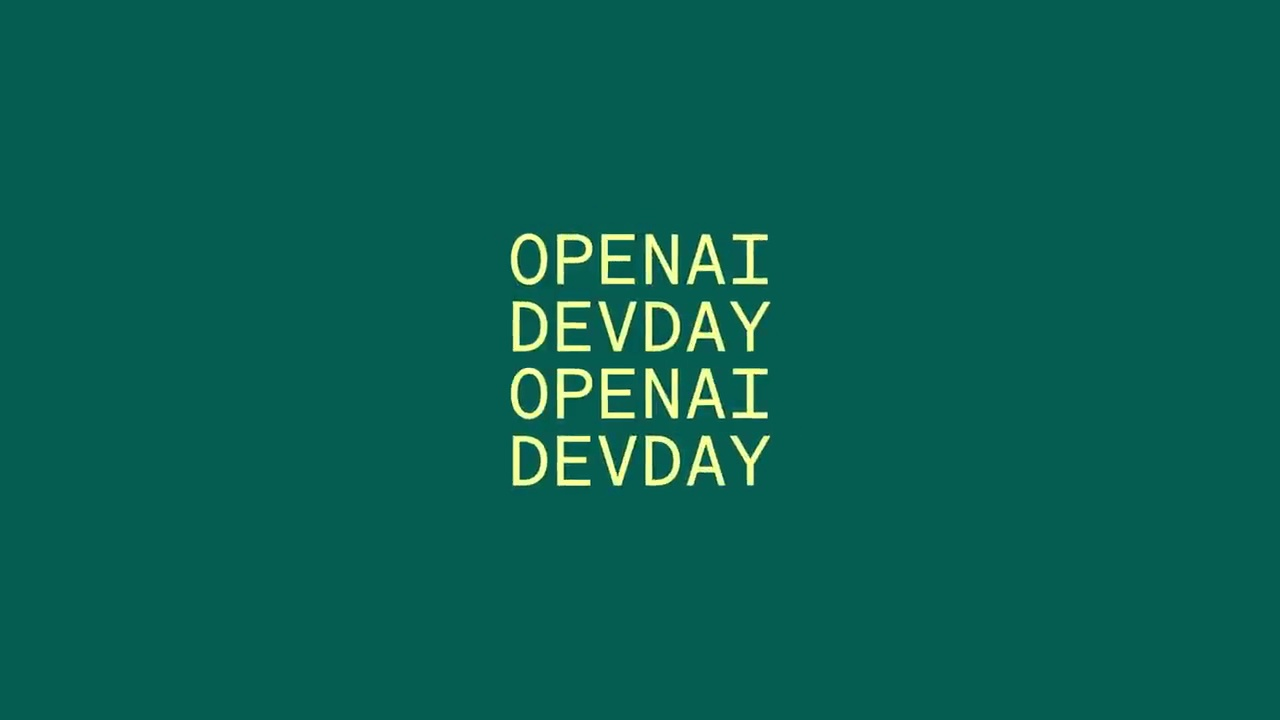

In [17]:
from IPython.display import Image, display, Audio, Markdown
import base64

IMAGE_PATH = "/Users/surendra/ai_embed/Machinelearnex/data/triangle.png"

# Preview image for context
# display(Image(IMAGE_PATH))
## Display the frames and audio for context
display_handle = display(None, display_id=True)
for img in base64Frames:
    display_handle.update(Image(data=base64.b64decode(img.encode("utf-8")), width=600))
    time.sleep(0.025)

Audio(audio_path)

# Example 1: Summarization

    Now that we have both the video frames and the audio, let's run a few different tests to generate a video summary to compare the results of using the models with different modalities. We should expect to see that the summary generated with context from both visual and audio inputs will be the most accurate, as the model is able to use the entire context from the video.

    1.Visual Summary
    2. Audio Summary
    3. Visual + Audio Summary

# Visual Summary

    The visual summary is generated by sending the model only the frames from the video. With just the frames, the model is likely to capture the visual aspects, but will miss any details discussed by the speaker.

In [11]:
response = client.chat.completions.create(
    model=MODEL,
    messages=[
    {"role": "system", "content": "You are generating a video summary. Please provide a summary of the video. Respond in Markdown."},
    {"role": "user", "content": [
        "These are the frames from the video.",
        *map(lambda x: {"type": "image_url",
                        "image_url": {"url": f'data:image/jpg;base64,{x}', "detail": "low"}}, base64Frames)
        ],
    }
    ],
    temperature=0,
)
print(response.choices[0].message.content)

# OpenAI Dev Day Summary

## Overview
The video captures highlights from OpenAI's Dev Day, showcasing new advancements and features in AI technology, particularly focusing on the latest iterations of their models.

## Key Highlights

### Event Introduction
- The event is branded as "OpenAI Dev Day," setting the stage for discussions on AI advancements.

### Keynote Recap
- The keynote features a recap of significant updates and innovations in OpenAI's offerings.

### Venue and Atmosphere
- The venue is lively, filled with attendees eager to learn about the latest in AI technology.

### Major Announcements
- **GPT-4 Turbo**: Introduction of a more efficient version of GPT-4, emphasizing speed and performance improvements.
- **DALL-E 3**: Updates on the image generation model, showcasing its capabilities.
- **Custom Models**: Introduction of features allowing users to create tailored AI models for specific needs.

### Technical Features
- **Function Calling**: Demonstrations of how the n

The results are as expected - the model is able to capture the high level aspects of the video visuals, but misses the details provided in the speech.

# Audio Summary

    The audio summary is generated by sending the model the audio transcript. With just the audio, the model is likely to bias towards the audio content, and will miss the context provided by the presentations and visuals.

    {audio} input for GPT-4o isn't currently available but will be coming soon! For now, we use our existing whisper-1 model to process the audio

In [12]:
# Transcribe the audio
transcription = client.audio.transcriptions.create(
    model="whisper-1",
    file=open(audio_path, "rb"),
)
## OPTIONAL: Uncomment the line below to print the transcription
#print("Transcript: ", transcription.text + "\n\n")

response = client.chat.completions.create(
    model=MODEL,
    messages=[
    {"role": "system", "content":"""You are generating a transcript summary. Create a summary of the provided transcription. Respond in Markdown."""},
    {"role": "user", "content": [
        {"type": "text", "text": f"The audio transcription is: {transcription.text}"}
        ],
    }
    ],
    temperature=0,
)
print(response.choices[0].message.content)

# OpenAI Dev Day Summary

On the inaugural OpenAI Dev Day, several significant updates and features were announced:

- **Launch of GPT-4 Turbo**: This new model supports up to 128,000 tokens of context and is designed to follow instructions more effectively.
  
- **JSON Mode**: A new feature that ensures the model responds with valid JSON.

- **Function Calling**: Users can now call multiple functions simultaneously.

- **Retrieval Feature**: This allows models to access external knowledge from documents or databases, enhancing their information base.

- **Knowledge Cutoff**: GPT-4 Turbo has knowledge up to April 2023, with plans for ongoing improvements.

- **DALL-E 3 and Text-to-Speech**: These models are now available in the API alongside GPT-4 Turbo.

- **Custom Models Program**: OpenAI will collaborate with companies to create tailored models for specific use cases.

- **Increased Rate Limits**: Established GPT-4 customers will see doubled tokens per minute, with options to reques

The audio summary is biased towards the content discussed during the speech, but comes out with much less structure than the video summary.

# Audio + Visual Summary

    The Audio + Visual summary is generated by sending the model both the visual and the audio from the video at once. 
    
    When sending both of these, the model is expected to better summarize since it can perceive the entire video at once.

In [15]:
## Generate a summary with visual and audio
response = client.chat.completions.create(
    model=MODEL,
    messages=[
    {"role": "system", "content":"""You are generating a video summary. Create a summary of the provided video and its transcript. Respond in Markdown"""},
    {"role": "user", "content": [
        "These are the frames from the video.",
        *map(lambda x: {"type": "image_url",
                        "image_url": {"url": f'data:image/jpg;base64,{x}', "detail": "low"}}, base64Frames),
        {"type": "text", "text": f"The audio transcription is: {transcription.text}"}
        ],
    }
],
    temperature=0,
)
print(response.choices[0].message.content)

# OpenAI Dev Day Summary

## Overview
The first-ever OpenAI Dev Day introduced several exciting updates and features, primarily focusing on the launch of **GPT-4 Turbo**. This event highlighted advancements in AI technology and its applications.

## Key Announcements

### 1. **GPT-4 Turbo**
- **Token Support**: Supports up to **128,000 tokens** of context.
- **JSON Mode**: A new feature ensuring responses are in valid JSON format.
- **Function Calling**: Enhanced capability to call multiple functions simultaneously and improved instruction adherence.

### 2. **Knowledge Retrieval**
- **External Knowledge Access**: Users can integrate knowledge from external documents or databases into their applications.
- **Knowledge Cutoff**: GPT-4 Turbo has knowledge up to **April 2023**.

### 3. **API Enhancements**
- **DALL-E 3 and Vision**: Integration of DALL-E 3 and GPT-4 Turbo with vision capabilities into the API.
- **Text-to-Speech Model**: A new model for converting text to speech.

### 4. 

After combining both the video and audio, we're able to get a much more detailed and comprehensive summary for the event which uses information from both the visual and audio elements from the video.

# Example 2: Question and Answering

    For the Q&A, we'll use the same concept as before to ask questions of our processed video while running the same 3 tests to demonstrate the benefit of combining input modalities:

    Visual Q&A
    Audio Q&A
    Visual + Audio Q&A

In [16]:
QUESTION = "Question: Why did Sam Altman have an example about raising windows and turning the radio on?"

In [18]:
QUESTION = "Question: Why did Sam have an example about raising windows and turning the radio on?"

qa_visual_response = client.chat.completions.create(
    model=MODEL,
    messages=[
    {"role": "system", "content": "Use the video to answer the provided question. Respond in Markdown."},
    {"role": "user", "content": [
        "These are the frames from the video.",
        *map(lambda x: {"type": "image_url", "image_url": {"url": f'data:image/jpg;base64,{x}', "detail": "low"}}, base64Frames),
        QUESTION
        ],
    }
    ],
    temperature=0,
)
print("Visual QA:\n" + qa_visual_response.choices[0].message.content)

Visual QA:
In the context of the presentation, Sam likely used the example of "raising windows and turning the radio on" to illustrate the concept of function calling in AI. This example demonstrates how AI can interpret natural language commands and translate them into specific functions or actions, showcasing the improved capabilities of the model in understanding and executing user requests. It emphasizes the AI's ability to handle more complex instructions and perform multiple tasks simultaneously, enhancing user interaction and functionality.


In [19]:
QUESTION = "Question: Why did Sam have an example about raising windows and turning the radio on?"
qa_audio_response = client.chat.completions.create(
    model=MODEL,
    messages=[
    {"role": "system", "content":"""Use the transcription to answer the provided question. Respond in Markdown."""},
    {"role": "user", "content": f"The audio transcription is: {transcription.text}. \n\n {QUESTION}"},
    ],
    temperature=0,
)
print("Audio QA:\n" + qa_audio_response.choices[0].message.content)

Audio QA:
The transcription provided does not include any mention of Sam, raising windows, or turning the radio on. Therefore, I cannot provide an answer to that specific question based on the given text. If you have more context or another transcription that includes that example, please share it, and I would be happy to help!


In [20]:
QUESTION = "Question: Why did Sam have an example about raising windows and turning the radio on?"

qa_both_response = client.chat.completions.create(
    model=MODEL,
    messages=[
    {"role": "system", "content":"""Use the video and transcription to answer the provided question."""},
    {"role": "user", "content": [
        "These are the frames from the video.",
        *map(lambda x: {"type": "image_url",
                        "image_url": {"url": f'data:image/jpg;base64,{x}', "detail": "low"}}, base64Frames),
                        {"type": "text", "text": f"The audio transcription is: {transcription.text}"},
        QUESTION
        ],
    }
    ],
    temperature=0,
)
print("Both QA:\n" + qa_both_response.choices[0].message.content)

Both QA:
Sam used the example of raising windows and turning the radio on to illustrate the new function calling feature in the GPT-4 Turbo model. This example demonstrated how the model can interpret natural language commands and translate them into specific function calls, showcasing its improved ability to follow instructions and perform actions based on user input. This highlights the model's enhanced understanding and versatility in handling practical tasks.


Comparing the three answers, the most accurate answer is generated by using both the audio and visual from the video. Sam Altman did not discuss the raising windows or radio on during the Keynote, but referenced an improved capability for the model to execute multiple functions in a single request while the examples were shown behind him.

# Conclusion

    Integrating many input modalities such as audio, visual, and textual, significantly enhances the performance of the model on a diverse range of tasks. This multimodal approach allows for more comprehensive understanding and interaction, mirroring more closely how humans perceive and process information.

    Currently, GPT-4o and GPT-4o mini in the API support text and image inputs, with audio capabilities coming soon.